# Исследовательский анализ данных

***Цель исследования***: выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

***Дано***: в нашем распоряжении данные сервиса **Яндекс Недвижимость** — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.

***Описание данных***: о каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка. 

In [1]:
#Загружаем библиотеки
import matplotlib.pylab as plt
import pandas as pd 
import numpy as np
import seaborn as sns

In [2]:
#Указываем формат таблиц:
# - количество строк в таблице было не больше 30
# - текст в ячейке отражался полностью вне зависимости от длины 
# - все числа отражались с двумя знаками после запятой
pd.set_option('max_rows', 30)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:.2f}'.format)
sns.set()

In [3]:
#Указываем путь к файлу
try:
    data_before = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
except:
    data_before = pd.read_csv('C:/Users/Boris/datasets/real_estate_data.csv', sep='\t')
#Прошу прощение, не додумался =(

In [4]:
data = data_before
#Выводим общую информацию
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Из информации видим названия колонок, где:

- **airports_nearest** — расстояние до ближайшего аэропорта в метрах (м)
- **balcony** — число балконов
- **ceiling_height** — высота потолков (м)
- **cityCenters_nearest** — расстояние до центра города (м)
- **days_exposition** — сколько дней было размещено объявление (от публикации до снятия)
- **first_day_exposition** — дата публикации
- **floor** — этаж
- **floors_total** — всего этажей в доме
- **is_apartment** — апартаменты (булев тип)
- **kitchen_area** — площадь кухни в квадратных метрах (м²)
- **last_price** — цена на момент снятия с публикации
- **living_area** — жилая площадь в квадратных метрах (м²)
- **locality_name** — название населённого пункта
- **open_plan** — свободная планировка (булев тип)
- **parks_around3000** — число парков в радиусе 3 км
- **parks_nearest** — расстояние до ближайшего парка (м)
- **ponds**_around3000 — число водоёмов в радиусе 3 км
- **ponds**_nearest — расстояние до ближайшего водоёма (м)
- **rooms** — число комнат
- **studio** — квартира-студия (булев тип)
- **total_area** — общая площадь квартиры в квадратных метрах (м²)
- **total_images** — число фотографий квартиры в объявлении

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.00,23699.00,23699.00,23699.00,14504.00,23613.00,21796.00,23699.00,21421.00,12180.00,18157.00,18180.00,18181.00,8079.00,18181.00,9110.00,20518.00
mean,9.86,6541548.77,60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,28793.67,14191.28,0.61,490.80,0.77,517.98,180.89
std,5.68,10887013.27,35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,12630.88,8608.39,0.80,342.32,0.94,277.72,219.73
min,0.00,12190.00,12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,3400000.00,40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,18585.00,9238.00,0.00,288.00,0.00,294.00,45.00
50%,9.00,4650000.00,52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,26726.00,13098.50,0.00,455.00,1.00,502.00,95.00
75%,14.00,6800000.00,69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,37273.00,16293.00,1.00,612.00,1.00,729.00,232.00
max,50.00,763000000.00,900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,84869.00,65968.00,3.00,3190.00,3.00,1344.00,1580.00


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

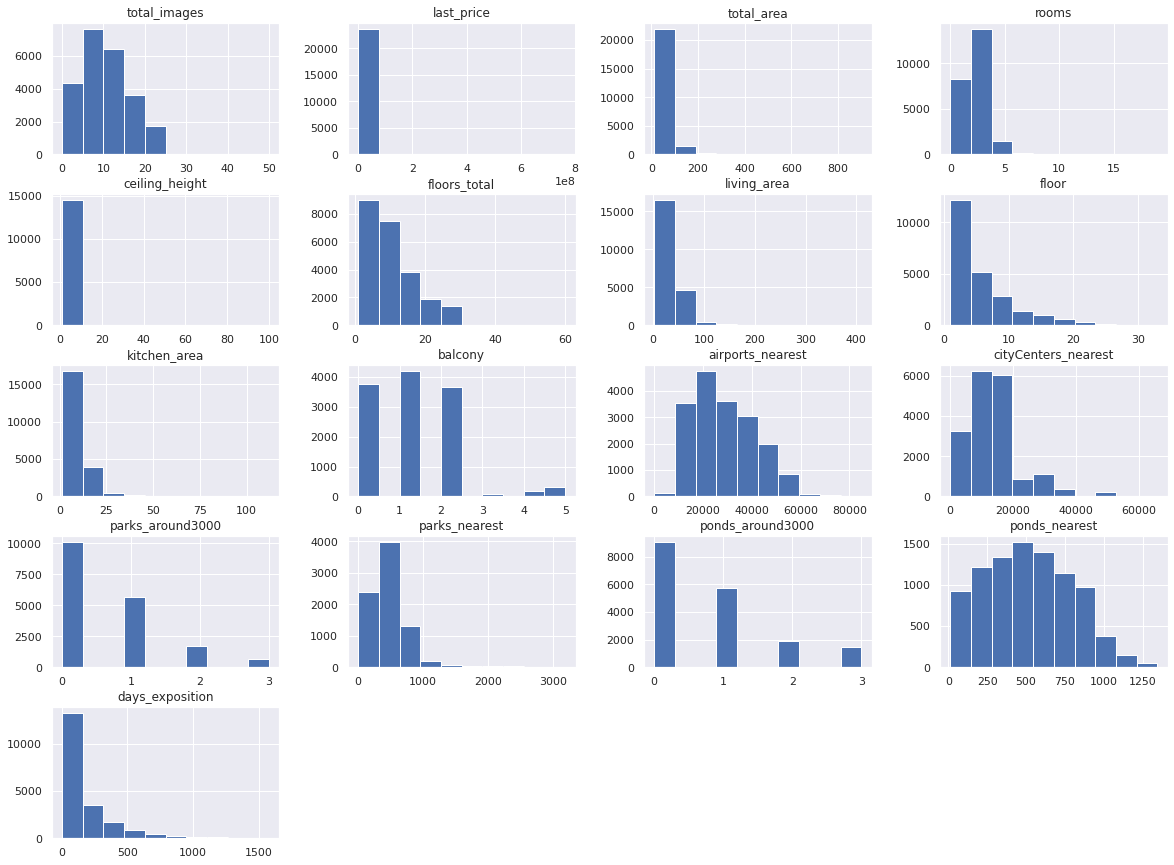

In [6]:
#Выводим общую гистограмму для всех числовых значений столбцов
data.hist(figsize=(20, 15))

Из представленных гистрограмм видно данные без предварительной обработки.

## Предварительная обработка данных

На предварительном этапе обработки данных необходимо:
-  Найти и изучить пропущенные значения в столцах;
-  Заполнить пропущенные значения;
-  Преобразовать типы данных в нужные;
-  Изучить и обработать уникальные значения (артефакты) в данных.

Необходимо провести работу, которая облегчить будущий анализ данных и исключит ошибки.

In [7]:
#Выводим первые 20 строк таблицы
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,...,NaN,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00


### Обработка пропусков

In [8]:
#Подсчитаем сумму пропусков в столбцах таблицы
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

После подсчета пропусков в таблице видим, что есть пропуски в столбце **is_apatment**, который, как мы помним, заполнен булевыми значениями данных, т.е. отсутствие данных в днем можно подразумевать как значение равное **False**.

In [9]:
#Заменяем все пропущенные данные в столбце is_apartmen на False
data['is_apartment'] = data['is_apartment'].fillna(value=False)

Пропуски в столбце **balcony** могут говорить об отсутствии балкона в квартире, можно даные значение заменить на 0.

In [10]:
#Заменяем все пропущенные данные в столбце balcony на 0
data['balcony'] = data['balcony'].fillna(value=0)

Пропущенные значения в столбце **floors_total** могу указывать на частный дом, таким образом, можно заменить все пропуски в данном столбце на 1 (т.е. один этаж).

In [11]:
#Заменяем пропущенные данные в столбце floors_total на 1
data['floors_total'] = data['floors_total'].fillna(value=1)

В таблице большое колличество пропусков данных связанных с наличием рядом парков и прудов, для удобства подсчета мы заменим пропуски на 0. Однако, чтобы избежать ошибки, мы проверим, если в столбце **parks_around3000** или **ponds_around3000** есть пропуск, но при этом в столбцах **parks_nearest** или **ponds_neares** расстояние меньше 3000, то это значит, что хотя бы 1 пруд или парк в данной зоне есть, то есть значение можно указать не 0, а 1. 

In [12]:
#Проверяем, есть ли на расстояние 3000 метров и меньше парк или пруд
for park in data[(data['parks_nearest'] <= 3000) & (data['parks_around3000'].isna())]: 
    data['parks_around3000'].fillna(value=1)
for pond in data[(data['ponds_nearest'] <= 3000) & (data['ponds_around3000'].isna())]: 
    data['ponds_around3000'].fillna(value=1)
#Заменяем пропуски в столбцах на 0
data['parks_around3000'] = data['parks_around3000'].fillna(value=0)
data['parks_nearest'] = data['parks_nearest'].fillna(value=0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0)
data['ponds_nearest'] = data['ponds_nearest'].fillna(value=0)

Для данных в столбцах **airports_nearest** и **cityCenters_nearest** пропуски заменим 0.


In [13]:
#Заменяем пропуски в столбцах airports_neares и cityCenrets_nearest на 0
data['airports_nearest'] = data['airports_nearest'].fillna(value=0)
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(value=0)

Данные с пропусками в столбце **locality_name** можно убрать, поскольку их мало и на конечную статистику они влиять не будут.

In [14]:
#Удаляем строки с пропусками в столбце locality_name и обновляем индексы
data = data.dropna(subset=['locality_name']).reset_index()

Данные в столбцах **ceiling_height**, **living_area** и **kitchen_area** можно заменить на медианное значение по колличеству комнат в других объявлениях.

In [15]:
#Делаем замену пропущенных данных в столбце living_area 
for i in data['rooms'].unique():
    data.loc[(data['rooms'] == i) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['rooms'] == i), 'living_area'].median()

In [16]:
# Делаем замену пропущенных данных в столбце living_area 
for t in data['rooms'].unique():
    data.loc[(data['rooms'] == t) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
    data.loc[(data['rooms'] == t), 'kitchen_area'].median()
#Оставшиеся пропуски свидетельствуют о том, что это студия, а для студии значение kitchen_area будет равно 0  
data['kitchen_area'] = data['kitchen_area'].fillna(0)

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [17]:
# Делаем замену пропущенных данных в столбце ceiling_height
for k in data['rooms'].unique():
    data.loc[(data['rooms'] == k) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(data['rooms'] == k), 'ceiling_height'].median()
#Для оставшегося пропущенного значения с 19 комнатами, которое единственное - 
# значение ceiling_height будет равно среднему значению высоты потолка
ceiling_height_median = data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(ceiling_height_median)

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [18]:
#Заного делаем подсчет по столбцам, для проверки
data.isna().sum()

index                      0
total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3180
dtype: int64

Таким образом, остались только пропуски в данных о дате продажи квартиры.

### Изменение типов данных 

In [19]:
#Смотрим информацию о типах данных столбцов
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 23650 non-null  int64  
 1   total_images          23650 non-null  int64  
 2   last_price            23650 non-null  float64
 3   total_area            23650 non-null  float64
 4   first_day_exposition  23650 non-null  object 
 5   rooms                 23650 non-null  int64  
 6   ceiling_height        23650 non-null  float64
 7   floors_total          23650 non-null  float64
 8   living_area           23650 non-null  float64
 9   floor                 23650 non-null  int64  
 10  is_apartment          23650 non-null  bool   
 11  studio                23650 non-null  bool   
 12  open_plan             23650 non-null  bool   
 13  kitchen_area          23650 non-null  float64
 14  balcony               23650 non-null  float64
 15  locality_name      

Заменяем тип данных в столбцах **floors_total**, **balcony**, **parks_around3000**, **ponds_around3000** и **days_exposition** на целочисленные, поскольку эти данные имеют колличественные значения.

In [20]:
#Заменяем тип данных на int
data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')

In [21]:
#Заменяем тип данных на datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 23650 non-null  int64         
 1   total_images          23650 non-null  int64         
 2   last_price            23650 non-null  float64       
 3   total_area            23650 non-null  float64       
 4   first_day_exposition  23650 non-null  datetime64[ns]
 5   rooms                 23650 non-null  int64         
 6   ceiling_height        23650 non-null  float64       
 7   floors_total          23650 non-null  int64         
 8   living_area           23650 non-null  float64       
 9   floor                 23650 non-null  int64         
 10  is_apartment          23650 non-null  bool          
 11  studio                23650 non-null  bool          
 12  open_plan             23650 non-null  bool          
 13  kitchen_area    

Основное изменение типов данных было в столбце **first_day_exposition**, в котором было указано время, когда квартира была выставлена на продажу, это изменение необходимо, чтобы можно было сгруппировать данные по началу публикации продажи. 

### Изучение уникальных значений столбцов

Для удобства группирования и более точных выводом, убираем типы локаций в столбце **locality_name**.

In [23]:
#Показываем уникальные значения для столбца locality_name
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [24]:
len(data['locality_name'].unique())

364

По данным видно, что есть ошибки в словах поселок и посёлок, а также, некоторые несоответствия в названиях местности.

In [25]:
#Создадим переменную locality, в которой укажем все названия, которые хотим убрать или заменить
locality = ['поселок ', 'посёлок ', 'деревня ', 'коттеджный поселок ', 'коттеджный посёлок ', 'село ', 'поселок городского типа ', 'посёлок городского типа ', 'садовое товарищество ', 'городской поселок ', 'городской посёлок ', 'городского типа ', 'городской ', 'садоводческое некоммерческое товарищество ', 'при железнодорожной станции ', 'имени ', 'коттеджный ', 'станции ']
#С помощью цикла for сделаем замены в данных
for local in locality: 
    data['locality_name'] = data['locality_name'].str.replace(local, '')
    

In [26]:
#Проверяем результат замены
data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

In [27]:
len(data['locality_name'].unique())

305

Таки образом, получается избежать ошибок в типах локаций, а также, упростить навигацию по имени. 

### Нахождение аномалий

В некоторых столбцах могут находится аномальные значения данных, при предварительном просмотре было выявлено, что в столбце **ceiling_height** есть квартиры с высотой 27 и выше метров. 

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 23650 non-null  int64         
 1   total_images          23650 non-null  int64         
 2   last_price            23650 non-null  float64       
 3   total_area            23650 non-null  float64       
 4   first_day_exposition  23650 non-null  datetime64[ns]
 5   rooms                 23650 non-null  int64         
 6   ceiling_height        23650 non-null  float64       
 7   floors_total          23650 non-null  int64         
 8   living_area           23650 non-null  float64       
 9   floor                 23650 non-null  int64         
 10  is_apartment          23650 non-null  bool          
 11  studio                23650 non-null  bool          
 12  open_plan             23650 non-null  bool          
 13  kitchen_area    

In [29]:
data['ceiling_height'].unique()

array([  2.7 ,   2.64,   2.6 ,   2.65,   3.03,   2.5 ,   2.67,   2.56,
         3.05,   2.75,   2.8 ,   2.9 ,   2.55,   3.1 ,   3.  ,   3.2 ,
         2.61,   3.25,   3.45,   2.77,   2.85,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   2.34,   3.4 ,
         3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,   2.58,
         3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.38,   3.13,   3.8 ,   3.15,   3.42,
         3.55,   3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,
         5.3 ,   5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,
         3.53,   2.83,   4.7 ,   2.4 ,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

Можно предположить, что значение 27 метров ошибочное и, скорее всего, имели ввиду 2.7 местра, поэтому для подобных аномальных значений мы сделае замену. 

In [30]:
#Указываем все аномальные значения, которые можно заменить
data['ceiling_height'] = data['ceiling_height'].replace({27.5 : 2.75, 22.6 : 2.26, 32 : 3.2, 25 : 2.5, 27 : 2.7, 24 : 2.4, 26 : 2.6, 20 : 2.0})

Тем не менее, остаются значения, которые трудно поддаются логике и их заменить не имеется возможностей, таких значений не много, поэтому мы можем их сразу отбросить.

In [31]:
#Оставляем только релевантные значения
data = data.query('ceiling_height > 1.5 and ceiling_height < 8')

In [32]:

# Код ревьюера
data.update(data[(data['ceiling_height'] >= 20) & (data['ceiling_height'] <= 36)]['ceiling_height']/10)
data['ceiling_height'].unique()

array([2.7 , 2.64, 2.6 , 2.65, 3.03, 2.5 , 2.67, 2.56, 3.05, 2.75, 2.8 ,
       2.9 , 2.55, 3.1 , 3.  , 3.2 , 2.61, 3.25, 3.45, 2.77, 2.85, 2.57,
       4.15, 3.5 , 3.3 , 2.71, 4.  , 2.47, 2.73, 2.84, 2.34, 3.4 , 3.06,
       2.72, 2.54, 2.51, 2.78, 2.76, 2.58, 3.7 , 2.52, 5.2 , 2.87, 2.66,
       2.59, 2.  , 2.45, 3.6 , 2.92, 3.11, 3.38, 3.13, 3.8 , 3.15, 3.42,
       3.55, 3.16, 3.62, 3.12, 2.53, 2.74, 2.96, 2.46, 5.3 , 5.  , 2.79,
       2.95, 4.06, 2.94, 3.82, 3.54, 3.53, 2.83, 4.7 , 2.4 , 3.01, 5.6 ,
       3.65, 3.9 , 3.18, 3.35, 2.3 , 3.57, 2.48, 2.62, 2.82, 3.98, 2.63,
       3.83, 3.52, 3.95, 3.75, 2.88, 3.67, 3.87, 3.66, 3.85, 3.86, 4.19,
       3.24, 4.8 , 4.5 , 4.2 , 3.36, 3.08, 3.68, 3.07, 3.37, 3.09, 3.26,
       3.34, 2.81, 3.44, 2.97, 3.14, 4.37, 2.68, 3.22, 3.27, 4.1 , 2.93,
       3.46, 3.47, 3.33, 3.63, 3.32, 2.98, 2.86, 3.17, 4.4 , 3.28, 3.04,
       4.45, 5.5 , 3.84, 3.23, 3.02, 3.21, 3.43, 3.78, 4.3 , 3.39, 2.69,
       3.31, 4.65, 3.56, 2.2 , 3.51, 3.93, 2.99, 3.

### Изменение названий столбцов

In [33]:
#Для более легкого и понятного вида изменим названия столбцов таблицы
data = data.rename(columns = {'cityCenters_nearest':'city_centers_nearest', 'parks_around3000':'parks_around','ponds_around3000':'ponds_around'})

Таким образом, предварительная обработка данных, в ходе которой были *обработаны пропуски*, *изменены типы данных*, *изучены и обработканы уникальные значения и аномалии*, была выполнена. 

## Вычисление вспомогательных параметров

Для вспомогательных расчетов, мы создадим новые столбцы, где подсчитаем цену за квадратный метр для каждой квартиры, день недели публикации, месяц публикации, год публикации.

In [34]:
#Вычисляем цену за квадратный метр для каждой квартиры
data['square_price'] = round(data['last_price'] / data['total_area'], 2)

In [35]:
#День недели начала публикации
data['week_day_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).weekday

In [36]:
#Месяц начала публикации
data['month_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month

In [37]:
#Год начала публикации
data['year_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year

In [38]:
#Создаем функцию распределения по типам этажей
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [39]:
#Добавляем столбец типов этажей
data['floor_type'] = data.apply(floor_type, axis=1)

In [40]:
#Вычисляем расстояние до центра города в км и округляем до целого
data['center_distance'] = round(data['city_centers_nearest'] / 1000)

Все вспомогательные параметры были вычислены, можно приступать к исследовательскому анализу полученных данных.

In [41]:
print('Процент оставшихся после предобработки данных:', len(data) / len(data_before) * 100, '%')
print(data.info())

Процент оставшихся после предобработки данных: 99.75526393518714 %
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23641 entries, 0 to 23649
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 23641 non-null  int64         
 1   total_images          23641 non-null  int64         
 2   last_price            23641 non-null  float64       
 3   total_area            23641 non-null  float64       
 4   first_day_exposition  23641 non-null  datetime64[ns]
 5   rooms                 23641 non-null  int64         
 6   ceiling_height        23641 non-null  float64       
 7   floors_total          23641 non-null  int64         
 8   living_area           23641 non-null  float64       
 9   floor                 23641 non-null  int64         
 10  is_apartment          23641 non-null  bool          
 11  studio                23641 non-null  bool          
 12  open_pl

## Исследовательский анализ данных

### Изучение параметров данных

Изучаем следующие параметры объекта: 

***Общая площадь***

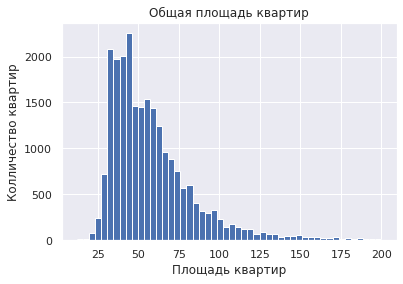

In [42]:
#Строим гистограмму для общей площади квартир
plt.hist(data['total_area'],
         bins=50,
         range=(12,200),
         color='C0',
         histtype='bar',
         stacked=False)
plt.title('Общая площадь квартир')
plt.xlabel('Площадь квартир')
plt.ylabel('Колличество квартир')
plt.show()

In [43]:
#Смотрим описание данных
data['total_area'].describe()

count   23641.00
mean       60.33
std        35.67
min        12.00
25%        40.00
50%        52.00
75%        69.74
max       900.00
Name: total_area, dtype: float64

Из полученных данных видно, что основной общей площадью продаваемых квартир является 52 квадратных метра, при этом разброс по данным 1 и 3 кварты составляет от 40 до 69.74 квадратных метров соответственно. Также, из данных видно, что максимальное значение общей площади 900, а минимальное 12 квадратных метров. 

***Жилая площадь***

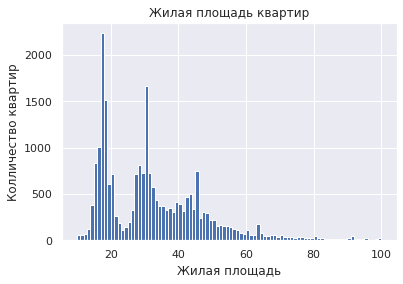

In [44]:
#Строим гистограмму для жилой площади квартир
plt.hist(data['living_area'],
         bins=90,
         range=(10,100),
         color='C0',
         histtype='bar',
         stacked=False)
plt.title('Жилая площадь квартир')
plt.xlabel('Жилая площадь')
plt.ylabel('Колличество квартир')
plt.show()

In [45]:
#Смотрим описание данных
data['living_area'].describe()

count   23641.00
mean       34.32
std        21.71
min         2.00
25%        18.40
50%        30.30
75%        42.70
max       409.70
Name: living_area, dtype: float64

Из построенной гистограммы четко видно 3 кварты, которые также отражены в данных. Медианным значением данных является 30.3 квадратных метра жилой площади. Первая 18.4 и третья кварта 42.7 квадратных метра сильно выделяется на графике. Можно ли утверждать, что данные значения являются популярными, или это советское наследие? В любом случае, данные довольно интересны.
При этом минимальной жилой площадью являетс 2 квадратных метра, а максимальной 409.7. Треклятый капитализм или ошибка в данных? =)

***Площадь кухни***

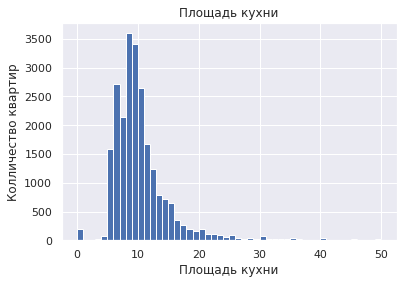

In [46]:
#Строим гистограмму для площади кухни
plt.hist(data['kitchen_area'],
         bins=50,
         range=(0,50),
         color='C0',
         histtype='bar',
         stacked=False)
plt.title('Площадь кухни')
plt.xlabel('Площадь кухни')
plt.ylabel('Колличество квартир')
plt.show()

In [47]:
#Смотрим описание данных
data['kitchen_area'].describe()

count   23641.00
mean       10.37
std         5.72
min         0.00
25%         7.20
50%         9.01
75%        11.50
max       112.00
Name: kitchen_area, dtype: float64

Медианное значение площади кухни в продаваемых квартирах 9.01 квадратных метра. При этом на гистограмме видно определенное колличество квартир, где площадь кухни равна 0, как мы определили раньше, это квартиры-студии, где кухни не предусмотрены. 

***Цена объекта***

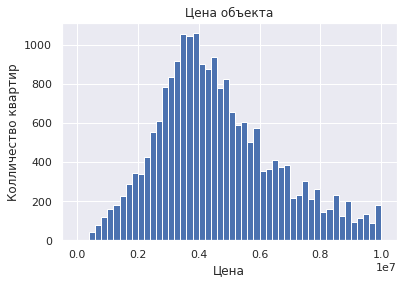

In [48]:
#Строим гистограмму для цены объекта
plt.hist(data['last_price'],
         bins=50,
         range=(10,10000000),
         color='C0',
         histtype='bar',
         stacked=False)
plt.title('Цена объекта')
plt.xlabel('Цена')
plt.ylabel('Колличество квартир')
plt.show()

In [49]:
#Смотрим описание данных
data['last_price'].describe()

count       23641.00
mean      6541442.88
std      10898222.39
min         12190.00
25%       3400000.00
50%       4650000.00
75%       6799000.00
max     763000000.00
Name: last_price, dtype: float64

По данным видно, что медианное значение стоимости кварит составляет 4650000 рублей. Однако, значение стандартного октлонения, указывает на то, что разброс по цене может быть очень большим. Нижняя цена за квартиру будет 12190 рублей, пора задумываться об отъезде в Питер? 

***Колличество комнат***

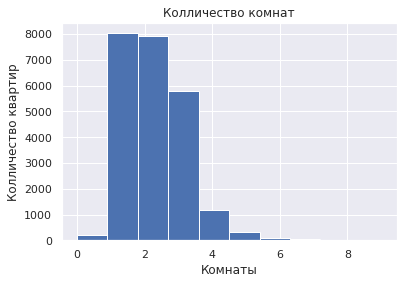

In [50]:
#Строим гистограмму для колличества комнат
plt.hist(data['rooms'],
         bins=10,
         range=(0,9),
         color='C0',
         histtype='bar',
         stacked=False)
plt.title('Колличество комнат')
plt.xlabel('Комнаты')
plt.ylabel('Колличество квартир')
plt.show()

In [51]:
#Смотрим описание данных
data['rooms'].describe()

count   23641.00
mean        2.07
std         1.08
min         0.00
25%         1.00
50%         2.00
75%         3.00
max        19.00
Name: rooms, dtype: float64

В основном выделяются квартиры с 1, 2 и 3 комнатами. По данным видно, что среднее колличество комнта равно 2-м. 

***Высота потолков***

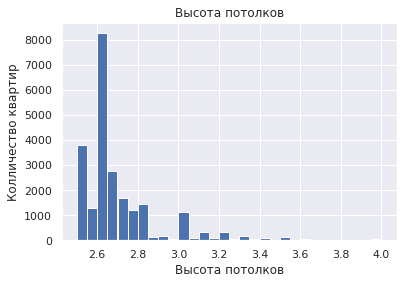

In [52]:
#Строим гистограмму для высоты потолков
plt.hist(data['ceiling_height'],
         bins=30,
         range=(2.5,4),
         color='C0',
         histtype='bar',
         stacked=False)
plt.title('Высота потолков')
plt.xlabel('Высота потолков')
plt.ylabel('Колличество квартир')
plt.show()

In [53]:
#Смотрим описание данных
data['ceiling_height'].describe()

count   23641.00
mean        2.69
std         0.23
min         1.75
25%         2.60
50%         2.64
75%         2.70
max         6.00
Name: ceiling_height, dtype: float64

По данным видно, что медианное значение высоты потолков равно 2.64 метра.

***Этаж квартиры***

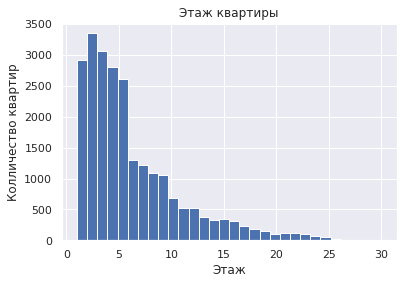

In [54]:
#Строим гистограмму для этажей квартиры
plt.hist(data['floor'],
         bins=30,
         range=(1,30),
         color='C0',
         histtype='bar',
         stacked=False)
plt.title('Этаж квартиры')
plt.xlabel('Этаж')
plt.ylabel('Колличество квартир')
plt.show()

In [55]:
#Смотрим описание данных
data['floor'].describe()

count   23641.00
mean        5.89
std         4.88
min         1.00
25%         2.00
50%         4.00
75%         8.00
max        33.00
Name: floor, dtype: float64

По данным видно, что средний этаж у продаваемых квартир четвертый.

***Тип этажа квартир***

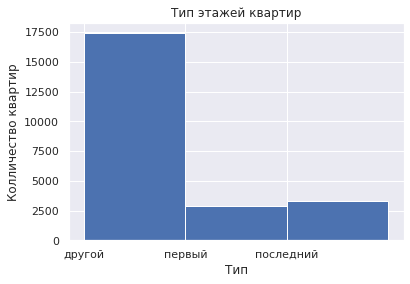

In [56]:
#Строим гистограмму для типа этажей квартир
plt.hist(data['floor_type'],
         bins=3,
         range=(0,3),
         color='C0',
         histtype='barstacked',
         stacked=False)
plt.title('Тип этажей квартир')
plt.xlabel('Тип')
plt.ylabel('Колличество квартир')
plt.show()

По данным видно, что в основном квартиры продаются не на первом и не последнем этажах.

***Общее колличество этажей в доме***

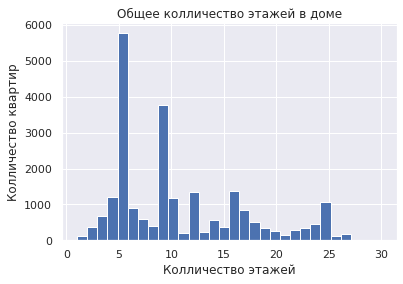

In [57]:
#Строим гистограмму для общего колличества этажей в доме
plt.hist(data['floors_total'],
         bins=30,
         range=(1,30),
         color='C0',
         histtype='bar',
         stacked=False)
plt.title('Общее колличество этажей в доме')
plt.xlabel('Колличество этажей')
plt.ylabel('Колличество квартир')
plt.show()

In [58]:
#Смотрим описание данных
data['floors_total'].describe()

count   23641.00
mean       10.64
std         6.61
min         1.00
25%         5.00
50%         9.00
75%        16.00
max        60.00
Name: floors_total, dtype: float64

По медианным значениям общее колличество этажей в основном составляет 9.

***Расстояние до центра города в метрах***

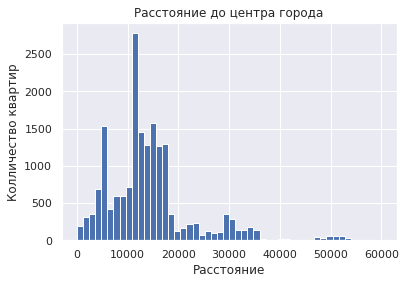

In [59]:
#Строим гистограмму для расстояния до центра города
plt.hist(data['center_distance']*1000,
         bins=50,
         range=(1,60000),
         color='C0',
         histtype='bar',
         stacked=False)
plt.title('Расстояние до центра города')
plt.xlabel('Расстояние')
plt.ylabel('Колличество квартир')
plt.show()

In [60]:
#Смотрим описание данных при дистанции не равно 0
data.query('center_distance != 0')['center_distance'].describe()

count   18105.00
mean       14.21
std         8.60
min         1.00
25%         9.00
50%        13.00
75%        16.00
max        66.00
Name: center_distance, dtype: float64

Из данных видно, что среднее расстояние до центра ~13 км. 

***Расстояние до ближайшего аэропорта***

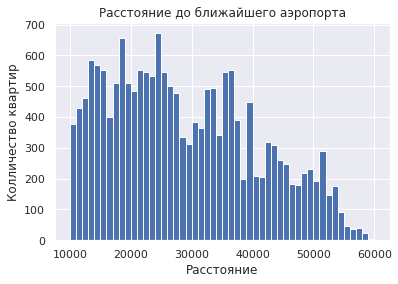

In [61]:
#Строим гистограмму для расстояния до ближайшего аэропорта
plt.hist(data['airports_nearest'],
         bins=50,
         range=(10000,60000),
         color='C0',
         histtype='bar',
         stacked=False)
plt.title('Расстояние до ближайшего аэропорта')
plt.xlabel('Расстояние')
plt.ylabel('Колличество квартир')
plt.show()

In [62]:
#Смотрим описание данных при дистанции не равно 0
data.query('airports_nearest != 0')['airports_nearest'].describe()

count   18108.00
mean    28805.48
std     12637.01
min      6450.00
25%     18576.00
50%     26756.50
75%     37310.00
max     84869.00
Name: airports_nearest, dtype: float64

Медианное значение расстояния от квартиры до аэропорта является 26756 метров. 

***День недели при публикации***

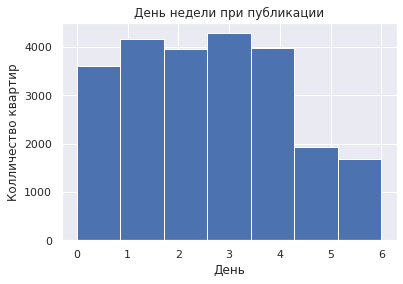

In [63]:
#Строим гистограмму для дня недели при публикации
plt.hist(data['week_day_exposition'],
         bins=7,
         range=(0,6),
         color='C0',
         histtype='bar',
         stacked=False)
plt.title('День недели при публикации')
plt.xlabel('День')
plt.ylabel('Колличество квартир')
plt.show()

Из гистограммы видно, что наибольшее колличество публикаций осуществляется в будние дни. 

***Месяц публикации***

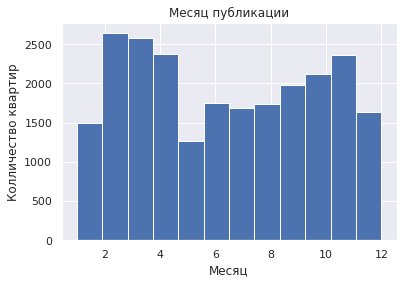

In [64]:
#Строим гистограмму для месяца публикации
plt.hist(data['month_exposition'],
         bins=12,
         range=(1,12),
         color='C0',
         histtype='bar',
         stacked=False)
plt.title('Месяц публикации')
plt.xlabel('Месяц')
plt.ylabel('Колличество квартир')
plt.show()

По данным видно, что много публикаций приходится на конец зимы и начало весны, а таже конец лета и осень, интересно, с чем это связано. 

### Изучение времени продаж квартир

Изучаем параметры времени продаж квартир, смотри от чего зависит скорость продажи, есть ли зависимость от стоимости квартиры и времени ее продажи.

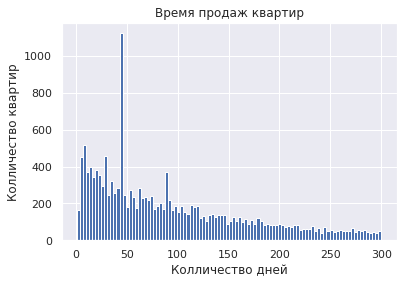

In [65]:
#Строим гистограмму для времени продаж квартир
plt.hist(data.query('days_exposition != [45, 60, 90]')['days_exposition'],
         bins=100,
         range=(1,300),
         color='C0',
         histtype='bar',
         stacked=False)
plt.title('Время продаж квартир')
plt.xlabel('Колличество дней')
plt.ylabel('Колличество квартир')
plt.show()

In [66]:
#Изучаем данные по времени продаж квартир
data.query('days_exposition != 0')['days_exposition'].describe()

count   20461.00
mean      180.74
std       219.80
min         1.00
25%        45.00
50%        95.00
75%       231.00
max      1580.00
Name: days_exposition, dtype: float64

Из данных видно, что медианное значение продажи квартир составляет 95 дней, а среднее время продажи 180 дней. 
Основное колличество квартир продается в срок до 100 дней. Однако, время продажи может доходить и до 230 дней и выше. 

                      Дни до продажи  Этаж  Стоимость  Площадь квартиры  \
Дни до продажи                  1.00 -0.04       0.09              0.16   
Этаж                           -0.04  1.00       0.00             -0.03   
Стоимость                       0.09  0.00       1.00              0.65   
Площадь квартиры                0.16 -0.03       0.65              1.00   
Расстояние до центра           -0.06  0.01      -0.20             -0.23   
Цена за квадрат                 0.06  0.06       0.76              0.29   

                      Расстояние до центра  Цена за квадрат  
Дни до продажи                       -0.06             0.06  
Этаж                                  0.01             0.06  
Стоимость                            -0.20             0.76  
Площадь квартиры                     -0.23             0.29  
Расстояние до центра                  1.00            -0.32  
Цена за квадрат                      -0.32             1.00  


<AxesSubplot:>

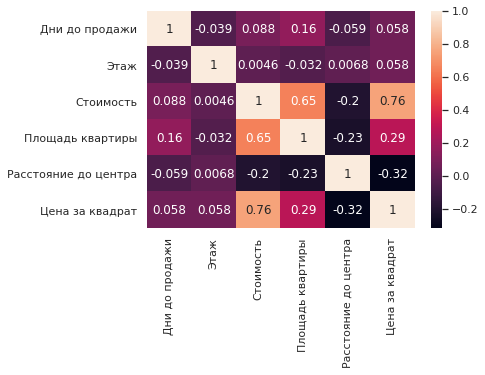

In [67]:
#Создаем матрицу корреляции для параметров и строим по ней heatmap
data_exposition = data.query('days_exposition !=0 and center_distance !=0')[['days_exposition', 'floor', 'last_price', 'total_area', 'center_distance', 'square_price']].copy()
data_exposition.columns = ['Дни до продажи', 'Этаж', 'Стоимость', 'Площадь квартиры', 'Расстояние до центра', 'Цена за квадрат']
data_exposition_corr = data_exposition.corr()
print(data_exposition_corr)
sns.heatmap(data_exposition_corr, annot=True, linecolor='white', cbar=True)

Для выявления зависимости составляем **heatmap** корреляции данных, как наиболее наглядный вариант. Отсюда видим, что зависимости других параметров от времени продажи квартир нет. Четко прослеживается корреляции площади квартиры и ее стоимости. 

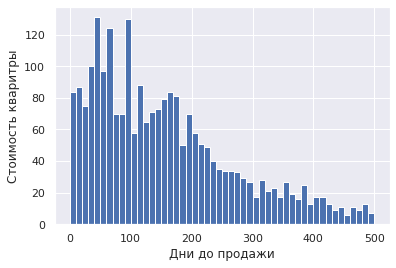

In [68]:
#Делаем сводную таблицу по дням продаи и стоимости квартиры
(
data.query('days_exposition != 0 and last_price !=0')
    .pivot_table(index='last_price', values='days_exposition')
    .plot(kind='hist', bins=50, range=(0, 500), legend=False)
)
plt.ylabel('Стоимость кваритры')
plt.xlabel('Дни до продажи')
plt.show()

На удивление квартиры с большей стоимостью продаются быстрее. Скорее всего это связано с местом продажи квартиры. Т.е. в Санкт-Петербурге стоимость выше, но и спрос больше, но данны параметр мы изучем позже. 

### Изучение факторов стоимости квартиры

Изучаем факторы влияния на стоимость квартир:
- общую площадь;
- жилую площадь;
- площадь кухни;
- колличество комнат;
- этаж;
- дату размещения.

array([[<AxesSubplot:xlabel='floor', ylabel='floor'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='floor'>,
        <AxesSubplot:xlabel='living_area', ylabel='floor'>,
        <AxesSubplot:xlabel='rooms', ylabel='floor'>,
        <AxesSubplot:xlabel='total_area', ylabel='floor'>],
       [<AxesSubplot:xlabel='floor', ylabel='kitchen_area'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='kitchen_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='kitchen_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='kitchen_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='kitchen_area'>],
       [<AxesSubplot:xlabel='floor', ylabel='living_area'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='living_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='living_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='living_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='living_area'>],
       [<AxesSubplot:xlabel='floor', ylabel='rooms'>,
        <AxesS

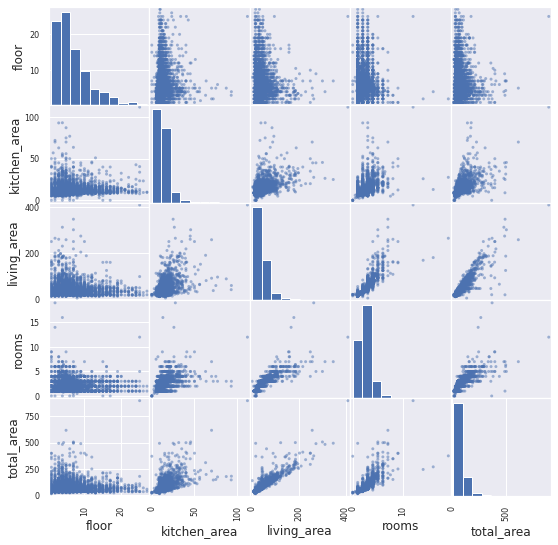

In [69]:
#Изучаем факторы стоимости квартиры от её общей площади, жилой площади, площади кухни, колличества комнат и этажа
data_price_total = data.pivot_table(index='last_price',
                                    values=['total_area', 'living_area', 'kitchen_area', 'rooms', 'floor'])
#Строим матрицу распределений для каждого параметра
pd.plotting.scatter_matrix(data_price_total, figsize=(9, 9))

Из матрицы распределений видно, что есть четкие зависимости стоимости квартиры от общей площади, жилой и кухонной площадей, а также от колличества комнат в квартире. А вот этаж не так сильно влияет на параметры стоимости.

***Посмотрим численные значения корреляции:***

               Этаж  Площадь кухни  Жилая площадь  Кол-во комнат  \
Этаж           1.00           0.03          -0.07          -0.07   
Площадь кухни  0.03           1.00           0.55           0.46   
Жилая площадь -0.07           0.55           1.00           0.86   
Кол-во комнат -0.07           0.46           0.86           1.00   
Общая площадь -0.04           0.63           0.91           0.79   

               Общая площадь  
Этаж                   -0.04  
Площадь кухни           0.63  
Жилая площадь           0.91  
Кол-во комнат           0.79  
Общая площадь           1.00  


<AxesSubplot:>

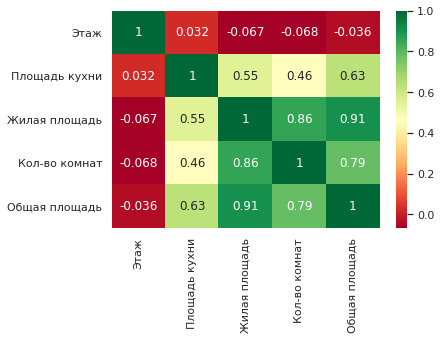

In [70]:
data_price_total.columns = ['Этаж', 'Площадь кухни', 'Жилая площадь', 'Кол-во комнат', 'Общая площадь']
print(data_price_total.corr())
sns.heatmap(data_price_total.corr(), annot=True, cbar=True, linecolor='white', cmap='RdYlGn')

Таким образом, при экстрополяции результатов, четко видно, что на стоимость квартиры влияет общая площадь, колличество комнат, жилая площадь и в меньшей степени площадь кухни. 

Помимо этого, необходимо посмотреть как стоимость продажи квартиры зависила от даты объявления.

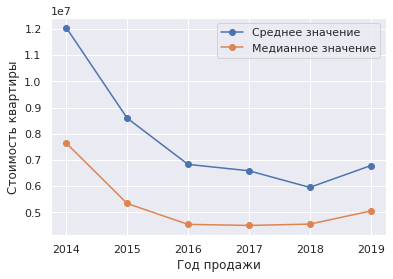

In [71]:
#Делаем сводную таблицу с данными стоимости квартир по годам
data_price_exposition_year = data.pivot_table(index='year_exposition',
                                              values='last_price',
                                              aggfunc=['mean', 'median'])
#Строим график по получившейся таблице
data_price_exposition_year.plot(style='-o', xlabel='Год продажи', ylabel='Стоимость квартиры')
plt.legend(['Среднее значение', 'Медианное значение'])

По данным видно, что общая стоимость квартир сильно просела с 2014 года, дальше после 2018 снова начала набирать в стоимости. 

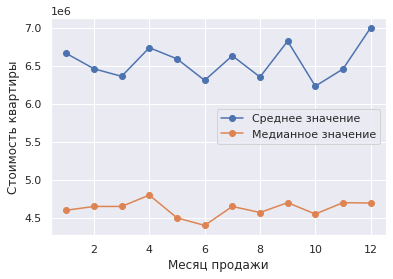

In [72]:
#Делаем сводную таблицу с данными стоимости квартир по месецам
data_price_exposition_month = data.pivot_table(index='month_exposition',
                                              values='last_price',
                                              aggfunc=['mean', 'median'])
#Строим график по получившейся таблице
data_price_exposition_month.plot(style='-o', legend=False, xlabel='Месяц продажи', ylabel='Стоимость квартиры')
plt.legend(['Среднее значение', 'Медианное значение'])

Если смотреть по месяцам, то видно небольшое отклонение в весенние месяцы в сторону повышения стоимости квартиры, тем не менее почти все данные однородны. 

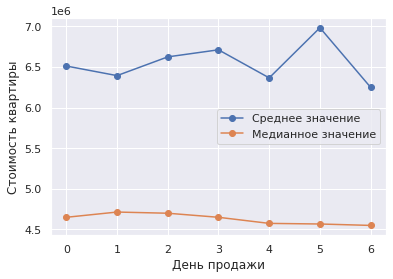

In [73]:
#Делаем сводную таблицу с данными стоимости квартир по дням недели
data_price_exposition_month = data.pivot_table(index='week_day_exposition',
                                              values='last_price',
                                              aggfunc=['mean', 'median'])
#Строим график по получившейся таблице
data_price_exposition_month.plot(style='-o', legend=False, xlabel='День продажи', ylabel='Стоимость квартиры')
plt.legend(['Среднее значение', 'Медианное значение'])

По медианным значения, нет разницы в какой день недели выставлять на продажу квартиру, почти везде стоимость одинаковая. 

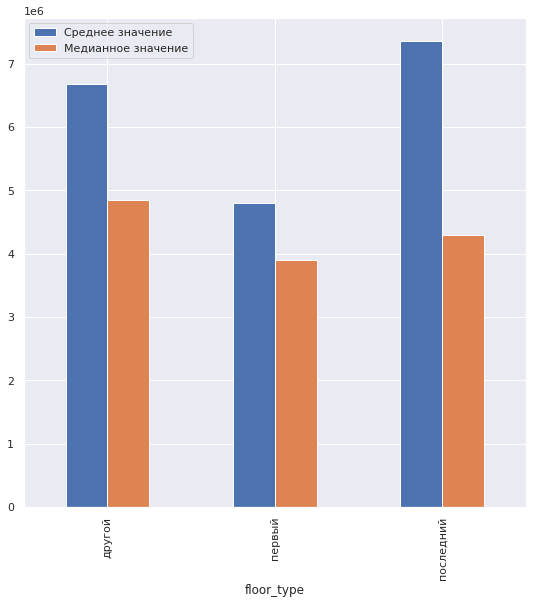

In [74]:
#Делаем сводную таблицу с данными стоимости квартир по типу этажа
data_price_floor_type = data.pivot_table(index='floor_type',
                                         values='last_price',
                                         aggfunc=['mean', 'median'])
#Строим график по получившейся таблице
data_price_floor_type.plot(kind='bar', figsize=(9, 9))
plt.legend(['Среднее значение', 'Медианное значение'])

Из графика видим, что последний этаж в среднем имеет большую стоимость, там не менее, если брать медианные данные, то стоимость квартиры больше у квартир не на первом или последнем этажах.

### Изучение стоимости квадратного метра по населенным пунктам

Нам необходимо посчитать среднюю цену одного квадратного метра в 10 населенных пунктах с наибольшим числом объявлений. А также, среди этих населенных пунктов выделить пункт с наибольшей и наименьшей стоимостью квадратного метра.  

Колличество объявлений по городам:
locality_name
Санкт-Петербург    15715
Мурино               590
Кудрово              472
Шушары               440
Всеволожск           398
Пушкин               369
Колпино              338
Парголово            327
Гатчина              307
Выборг               237
Name: locality_name, dtype: int64


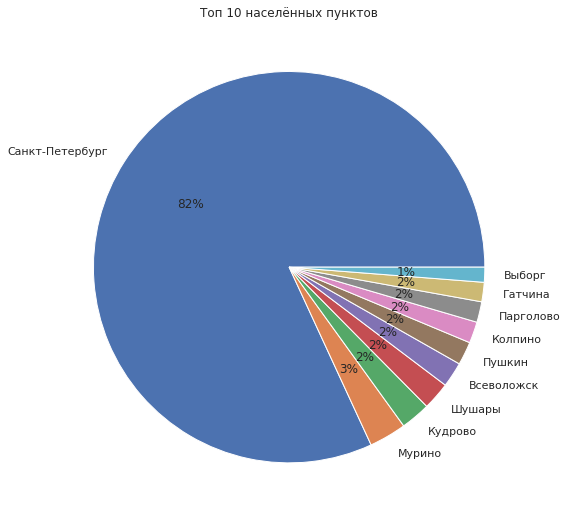

In [75]:
#Группируем данные по населённым пунктам и считаем колличества объявлений там, составляем топ 10
city_top = data.groupby('locality_name')['locality_name'].count().sort_values(ascending=False).head(10)
#Строим круговую диограмму
city_top.plot(kind='pie', ylabel='', title='Топ 10 населённых пунктов', autopct='%1.0f%%', figsize=(9, 9))
print('Колличество объявлений по городам:')
print(city_top)

Как мы видим, Санкт-Петербург занимает подавляющее колличество объявлений о продаже.

<AxesSubplot:ylabel='Средняя стоимость квадратного метра'>

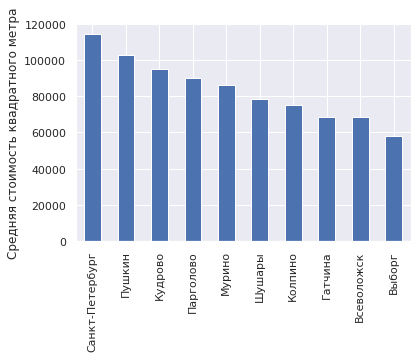

In [76]:
#Делаем сводную таблицу, с индексами из топ 10 и средней стоимостью квадратного метра
city_square_price = data.query('locality_name in @city_top.index').pivot_table(index='locality_name', values='square_price')
#Строим столбчатый график
(
city_square_price.sort_values(by='square_price', ascending=False)
                 .plot(kind='bar', legend=False, xlabel='', ylabel='Средняя стоимость квадратного метра')
)    

По графику видно, что наибольшей ценностью квадратного метра жилья обладает Санкт-Петербург, далее идут пригородные Пушкин и Кудрово. Наименьшей стоимостью квадратного метра обладает Выборг, который замыкает топ 10 город по стоимости квадратного метра. 

### Изучение стоиомости км до центра города

Вычисляем среднюю стоимость каждого км до центра города

<AxesSubplot:xlabel='Расстояние до центра', ylabel='Средняя стоимость квадратного м квартиры'>

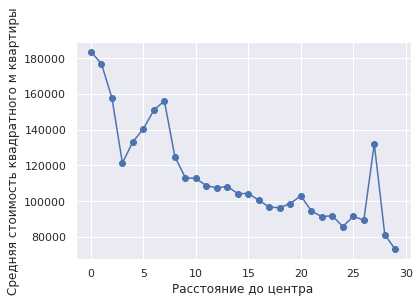

In [77]:
#Делаем сводную таблицу
data_distance_price = data.query('locality_name == "Санкт-Петербург"').pivot_table(index='center_distance', 
                                                                                   values='square_price')
#Делаем график
data_distance_price.plot(style='-o', 
                         legend=False, 
                         xlabel='Расстояние до центра', 
                         ylabel='Средняя стоимость квадратного м квартиры')

График показывает, что чем дальше квартира находится от центра города, тем дешевле квадратный метр её стоимости.

## Общий вывод

**Предварительная обработка данных:**
-  были найдены и обработаны пропуски в данных;
-  изменены типы данных, в особенности в столбце с датой объявлления;
-  найдены и обработанные некорректные названия населённых пунктов;
-  найдены и обработаны аномальные значения данных;
-  обработаны названия столбцов для более лёгкого ориентирования по данным.

**Вычисления вспомогательных параметров:**
для вспомогательных расчтетов были созданы новые столбцы, где была вычислена цена за квадратный метр для каждой квартиры, добален тип этажей и расстояние до центра города в киллометрах. А также, вычислены день недели, название месяца и год, когда было опубликовано объявление. 

**Проведён исследовательский анализ данных**

Изучены параметры общей, жилой и кухонной площадей квартир, цена за квартиру, колличество комнат и этаж расположения, высота потолка и расстояние до центра, аэропорта и времени, когда квартира была выложена на продажу. 

***Время продажи квартир:*** из данных выяснили, что медианное время продажи квартир составляет 95 дней, а среднее время продажи 180 дней. Т.е. основное колличество квартир продается в срок до 10 дней. При этом, по 1 кварте, можно сказать что 45 дней будет являтся быстрой продажей, а 231 день долгой. Также, было выяснено, что корреляционной зависимости от этажа, площади, расстояния до центра на время продажи квартир нет. Тем не менее, по данным можно увидеть, что квартиры с большей стоимость быстрее продаются, что может быть связано с тем, что данные квартиры продаются в Сантк-Петербурге, а не окрестностях.

***Изучение факторов стоимости квартир:*** было выяснено, что на стоимость квартиры в значительной степени вляют площадь кухни, жилая площадь, колличество комнат, общая площадь. Также, было выявлено, что с 2014 года квартиры несколько потеряли в стоимости, но после 2018 года снова начался рост. Некоторый рост числа продаж квартир прослеживается в весенние месяцы, но он незначительный. 

***Изучение стоимости квадратного метра по населенным пунктам:*** значительное колличество объявлений по продажам квартир было выявлено в Санкт-Петербурге и его пригородах. Это же обуславливает и среднюю стоимость за квадратный метр, где самая большая стоимость будет в Санкт-Петербурге, далее идут его пригороды -Пушкин, Кудрово, Парголово, Мурино, замыкает же топ 10 населённых пунктов Выборг. 

***Изучение стоимости км до центра города:*** по данным было выявлено, что чем ближе к центру города, тем больше стоимость квадратного км. 